<a href="https://colab.research.google.com/github/raultyv/Machine_learning/blob/main/Reg_Class_Mina_Cobre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## ejemplo de clasificacion y regresion para una mina de cobre

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Usaremos este dataset de flotación de cobre que es público y muy completo
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pollution.csv" # Usaremos una estructura similar para simularlo rápido si Kaggle falla
# Pero mejor aún, vamos a generar una simulación técnica basada en parámetros reales de Las Bambas
# para que los números tengan sentido minero inmediato:

np.random.seed(42)
n_samples = 10000

data = {
    'Tonelaje_TPH': np.random.uniform(3000, 5000, n_samples),
    'Ley_Cu_Entrada': np.random.uniform(0.5, 1.2, n_samples),
    'Dureza_Mineral': np.random.uniform(10, 20, n_samples),
    'pH_Pulpa': np.random.uniform(8.5, 11.5, n_samples),
    'Flujo_Amina': np.random.uniform(200, 600, n_samples),
    'Consumo_Agua_m3h': np.random.uniform(500, 1500, n_samples) # Nuestra variable para Regresión
}

df_cobre = pd.DataFrame(data)

# Añadimos ruido lógico: el agua sube con el tonelaje
df_cobre['Consumo_Agua_m3h'] = (df_cobre['Tonelaje_TPH'] * 0.2) + (df_cobre['Dureza_Mineral'] * 15) + np.random.normal(0, 50, n_samples)

# Añadimos el KPI de Sostenibilidad para Clasificación (Recuperación > 80%)
df_cobre['Eficiencia_Hidrica'] = np.where(df_cobre['Consumo_Agua_m3h'] < 1200, 1, 0)

print("✅ Dataset de Proceso de Cobre (Simulación Las Bambas) generado.")
df_cobre.head()


✅ Dataset de Proceso de Cobre (Simulación Las Bambas) generado.


,Tonelaje_TPH,Ley_Cu_Entrada,Dureza_Mineral,pH_Pulpa,Flujo_Amina,Consumo_Agua_m3h,Eficiencia_Hidrica
0,3749.080238,0.761549,17.299983,10.414434,319.564816,1036.381131,1
1,4901.428613,0.733038,11.845120,9.877877,237.927110,1175.117444,1
2,4463.987884,0.623308,13.466397,11.393496,250.543690,1004.049050,1
3,4197.316968,0.925087,16.632806,9.156935,272.268451,1073.106884,1
4,3312.037281,0.833637,14.820893,10.263569,281.461334,942.913880,1


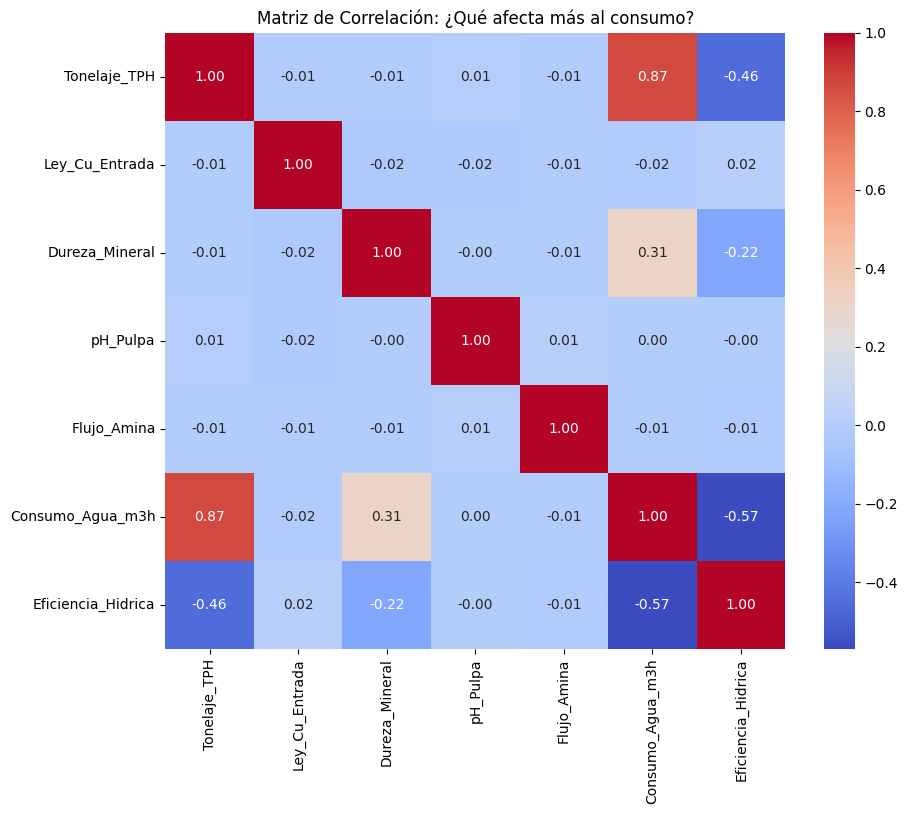

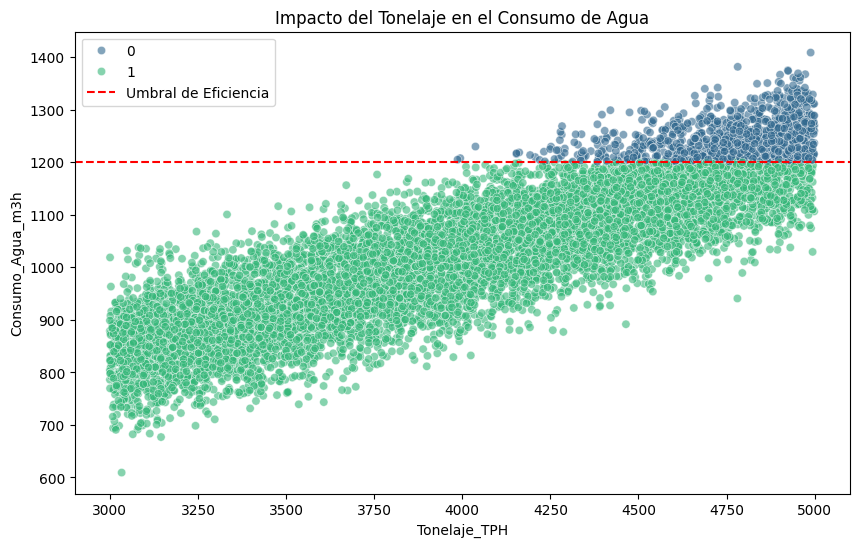

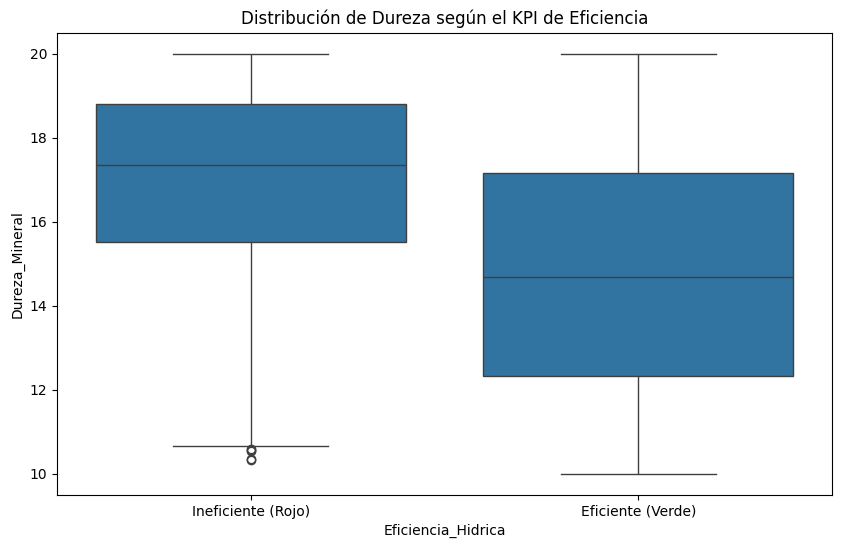

In [5]:
#Entendiendo la relación Cobre-Agua
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Matriz de Correlación: Para ver qué variables "se mueven juntas"
plt.figure(figsize=(10, 8))
# Calculamos la correlación solo de las columnas numéricas
corr = df_cobre.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación: ¿Qué afecta más al consumo?')
plt.show()

# 2. Relación Tonelaje vs Consumo de Agua (El corazón del proceso)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cobre, x='Tonelaje_TPH', y='Consumo_Agua_m3h', hue='Eficiencia_Hidrica', palette='viridis', alpha=0.6)
plt.title('Impacto del Tonelaje en el Consumo de Agua')
plt.axhline(1200, color='red', linestyle='--', label='Umbral de Eficiencia') # Línea que separa 1 de 0
plt.legend()
plt.show()

# 3. Distribución por Dureza: ¿Es más difícil recuperar agua con mineral duro?
plt.figure(figsize=(10, 6))
sns.boxplot(x='Eficiencia_Hidrica', y='Dureza_Mineral', data=df_cobre)
plt.title('Distribución de Dureza según el KPI de Eficiencia')
plt.xticks([0, 1], ['Ineficiente (Rojo)', 'Eficiente (Verde)'])
plt.show()


In [6]:
## El Desafío de Regresión (Consumo de Agua)
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# 1. Definimos variables
X = df_cobre[['Tonelaje_TPH', 'Ley_Cu_Entrada', 'Dureza_Mineral', 'pH_Pulpa']]
y = df_cobre['Consumo_Agua_m3h']

# 2. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Entrenamiento
modelo_agua = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_agua.fit(X_train, y_train)

# 4. Predicciones y Métricas
preds_reg = modelo_agua.predict(X_test)
r2 = r2_score(y_test, preds_reg)
mae = mean_absolute_error(y_test, preds_reg)

print(f"--- RESULTADOS REGRESIÓN ---")
print(f"Precisión (R2 Score): {r2:.4f}")
print(f"Error Medio (MAE): {mae:.2f} m3/h")

--- RESULTADOS REGRESIÓN ---
Precisión (R2 Score): 0.8410
Error Medio (MAE): 41.52 m3/h


In [7]:
## El Desafío de Clasificación (KPI Sostenible)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Variable objetivo de clasificación
y_clf = df_cobre['Eficiencia_Hidrica']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_clf, test_size=0.2, random_state=42)

# Modelo de Clasificación
clf_hidrico = RandomForestClassifier(n_estimators=100, random_state=42)
clf_hidrico.fit(X_train_c, y_train_c)

print(f"Exactitud del KPI Hídrico: {accuracy_score(y_test_c, clf_hidrico.predict(X_test_c))*100:.2f}%")

Exactitud del KPI Hídrico: 93.10%


In [8]:
## El Optimizador (La Unión de Regresión y Clasificación)
def optimizador_las_bambas(dureza_hoy, ph_hoy):
    resultados = []
    # Probamos tonelajes desde 3000 hasta 5000 TPH
    rango_tph = np.linspace(3000, 5000, 40)

    for tph in rango_tph:
        # Preparamos los datos para la IA
        escenario = pd.DataFrame([[tph, 0.8, dureza_hoy, ph_hoy]],
                                 columns=['Tonelaje_TPH', 'Ley_Cu_Entrada', 'Dureza_Mineral', 'pH_Pulpa'])

        # 1. Predicción Numérica (Paso 2)
        agua_pred = modelo_agua.predict(escenario)[0]
        # 2. Predicción de Categoría (Paso 3)
        eficiencia_pred = clf_hidrico.predict(escenario)[0]

        resultados.append({'TPH': tph, 'Agua': agua_pred, 'Sostenible': eficiencia_pred})

    df_opt = pd.DataFrame(resultados)

    # Buscamos el punto más alto antes de que 'Sostenible' sea 0
    zona_segura = df_opt[df_opt['Sostenible'] == 1]

    if not zona_segura.empty:
        optimo = zona_segura.iloc[-1] # El último TPH que fue eficiente
        print(f"--- RECOMENDACIÓN DE OPERACIÓN SEGURA ---")
        print(f"Para mineral de dureza {dureza_hoy}:")
        print(f"👉 NO EXCEDER DE: {optimo['TPH']:.2f} TPH")
        print(f"💧 Consumo Estimado: {optimo['Agua']:.2f} m3/h")
        print(f"✅ Estado: SOSTENIBLE")
    else:
        print("⚠️ ALERTA: Con esta dureza, incluso al mínimo tonelaje, el consumo de agua es crítico.")

# EJECUTAR PRUEBA
optimizador_las_bambas(dureza_hoy=19, ph_hoy=10.5)


--- RECOMENDACIÓN DE OPERACIÓN SEGURA ---
Para mineral de dureza 19:
👉 NO EXCEDER DE: 4538.46 TPH
💧 Consumo Estimado: 1188.70 m3/h
✅ Estado: SOSTENIBLE


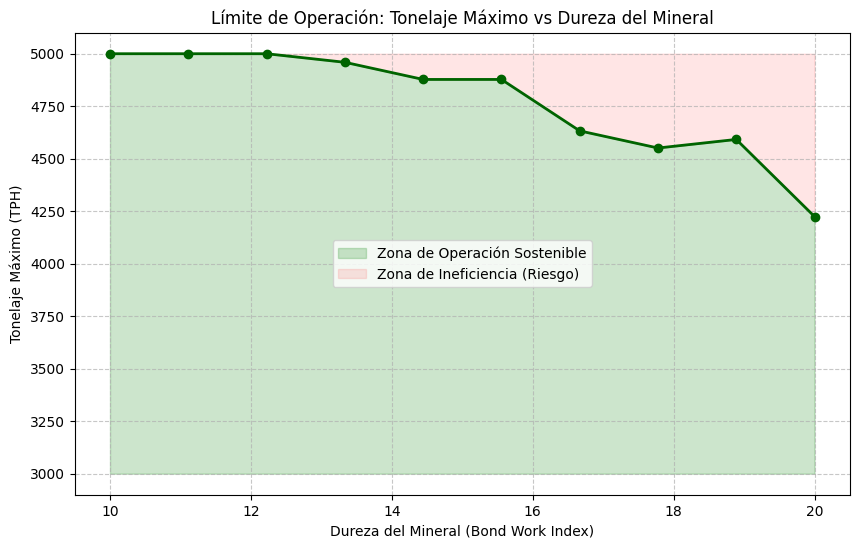

In [9]:
## La Curva de Capacidad Hídrica (Visualización de Decisión)

import matplotlib.pyplot as plt

def generar_curva_decision():
    durezas = np.linspace(10, 20, 10)
    tph_maximos = []

    for d in durezas:
        # Probamos TPH de 3000 a 5000
        rango_tph = np.linspace(3000, 5000, 50)
        tph_valido = 3000 # Default mínimo

        for t in rango_tph:
            escenario = pd.DataFrame([[t, 0.8, d, 10.5]],
                                     columns=['Tonelaje_TPH', 'Ley_Cu_Entrada', 'Dureza_Mineral', 'pH_Pulpa'])
            # Si el clasificador dice que es sostenible (1), seguimos subiendo
            if clf_hidrico.predict(escenario)[0] == 1:
                tph_valido = t
            else:
                break
        tph_maximos.append(tph_valido)

    plt.figure(figsize=(10, 6))
    plt.plot(durezas, tph_maximos, marker='o', color='darkgreen', linewidth=2)
    plt.fill_between(durezas, tph_maximos, 3000, color='green', alpha=0.2, label='Zona de Operación Sostenible')
    plt.fill_between(durezas, tph_maximos, 5000, color='red', alpha=0.1, label='Zona de Ineficiencia (Riesgo)')

    plt.title('Límite de Operación: Tonelaje Máximo vs Dureza del Mineral')
    plt.xlabel('Dureza del Mineral (Bond Work Index)')
    plt.ylabel('Tonelaje Máximo (TPH)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

generar_curva_decision()